In [1]:
import numpy as np
from PIL import Image
im = Image.open('flower.png')
im.show()


In [2]:
im = im.resize((500,500), resample=0)
im.show()

In [3]:
im= im.rotate(45)
im.show()

In [4]:
im = Image.open('flower.png').resize((500,500), resample=0).rotate(45).convert('LA')
im.save('greyscale.png')
im.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gry(rgb):
    a = np.array(rgb) # this will convert the PIL.Image object to numpy array representation
    a.shape
    return np.dot(a[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('flower.png')     
gray = rgb2gry(img)  
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

<Figure size 640x480 with 1 Axes>

(202, 201)


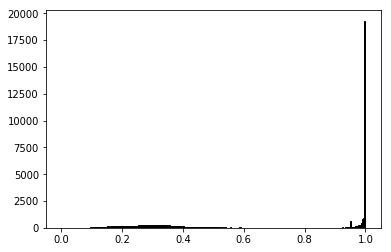

In [ ]:
print (gray.shape)
plt.hist(gray.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

plt.show() 

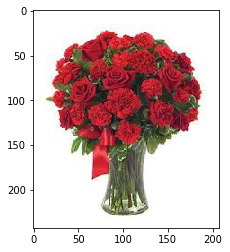

In [ ]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('flower.jpg')

# display the image
plt.imshow(img, cmap='gray')

(array([  647.,   621.,  1056.,  1514.,  2248.,  3092.,  3732.,  3980.,
         3969.,  3569.,  3726.,  2514.,  2198.,  1966.,  1707.,  1553.,
         1500.,  1449.,  1306.,  1265.,  1487.,  1096.,  1049.,  1007.,
          943.,   944.,   883.,   925.,   925.,   884.,  1095.,   911.,
          882.,   873.,   865.,   778.,   725.,   675.,   638.,   542.,
          642.,   453.,   481.,   418.,   510.,   541.,   758.,  1254.,
         2327., 82509.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

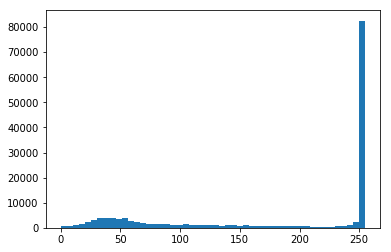

In [ ]:
# convert our image into a numpy array
img = np.asarray(img)

# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [ ]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

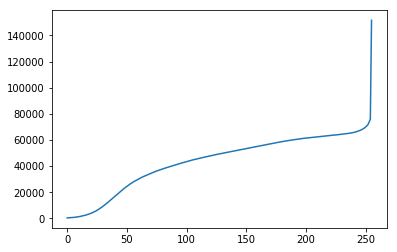

In [ ]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

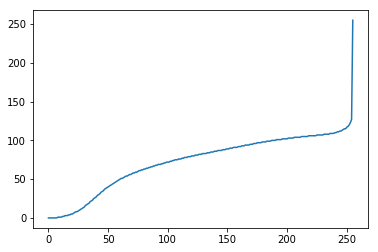

In [ ]:
# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

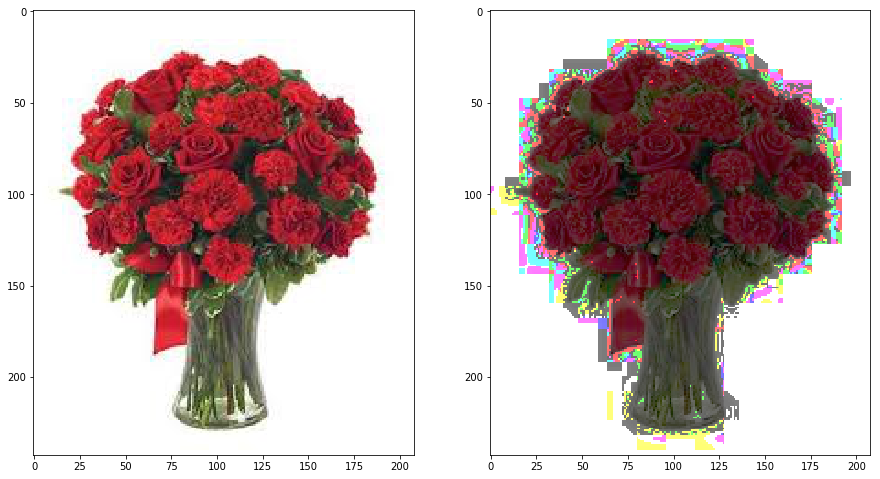

In [ ]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

In [ ]:
import cv2
import numpy as np
img = cv2.imread('flower.png')               
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)               
dst = cv2.cornerHarris(gray,2,3,0.04)
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img) 
if cv2.waitKey(0) & 0xff == 27:
    Shape(cv2.destroyAllWindows())

In [ ]:
import cv2
import numpy as np
surf=cv2.SURF(); 
img = cv2.imread('flower.png', cv2.IMREAD_GRAYSCALE) 
orb = cv2.ORB(nfeatures=1500) 
keypoints, descriptors = surf.detectAndCompute(img, None)
img = cv2.drawKeypoints(img, keypoints, None)
cv2.imshow("Image", img) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [ ]:
import cv2 
import numpy as np 
img = cv2.imread('flower.png', cv2.IMREAD_GRAYSCALE) 

sift=cv2.SIFT(); 

  

keypoints, descriptors = sift.detectAndCompute(img, None) 

  

img = cv2.drawKeypoints(img, keypoints, None) 

  

cv2.imshow("Image", img) 

cv2.waitKey(0) 

cv2.destroyAllWindows() 